In [17]:
# import important packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.datasets import load_boston # boston data set is part of sklearn

/home/ankur/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load Datasets

In [5]:
# Load Boston housing data set
boston = load_boston()

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


This data frame contains the following columns:

crim     
per capita crime rate by town.

zn     
proportion of residential land zoned for lots over 25,000 sq.ft.

indus      
proportion of non-retail business acres per town.

chas        
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox       
nitrogen oxides concentration (parts per 10 million).

rm      
average number of rooms per dwelling.

age      
proportion of owner-occupied units built prior to 1940.

dis      
weighted mean of distances to five Boston employment centres.

rad       
index of accessibility to radial highways.

tax       
full-value property-tax rate per $10,000.

ptratio      
pupil-teacher ratio by town.

black      
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat      
lower status of the population (percent).

medv     
median value of owner-occupied homes in $1000s.

/home/ankur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


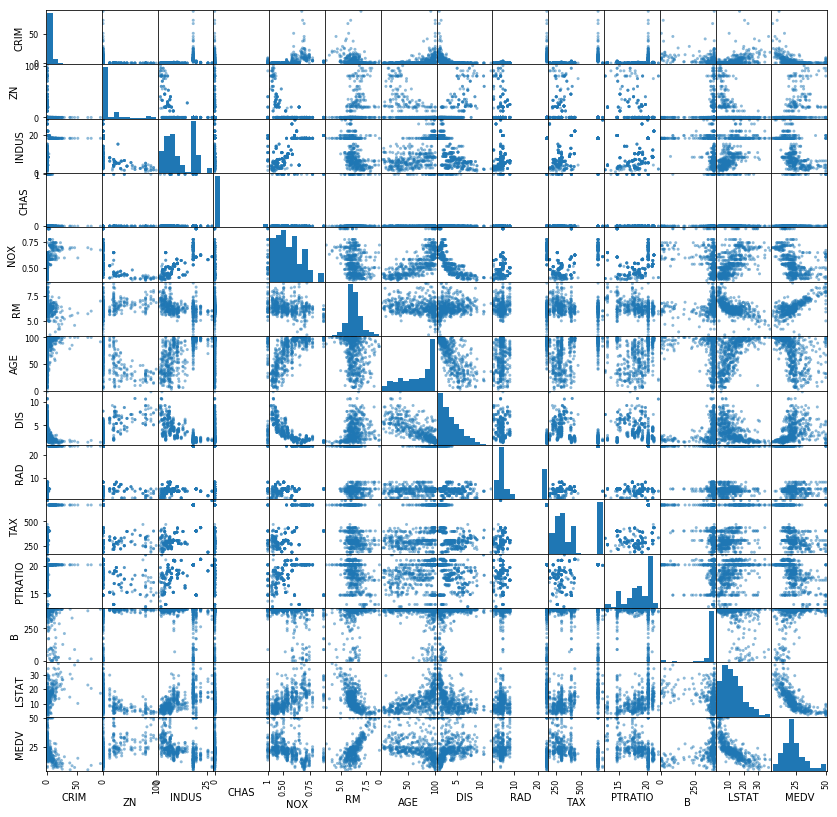

In [15]:
# multivariate plots
# Now we can look at the interactions between the variables.

# scatter plot matrix
scatter_matrix(boston_df,figsize=(14,14))
pyplot.show()

#### Regress LSTAT onto MEDV (Statsmodels)

### without a constant

In [19]:
# set the independent variable as the LSTAT
X = boston_df.LSTAT

# set the dependent variable
Y = boston_df.MEDV

# create the model instance and fit
linear_model = sm.OLS(Y,X)
linear_results = linear_model.fit()
# data about the model is stored in summary
print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           2.71e-67
Time:                        23:42:49   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.0

### with a constant

In [21]:
# set the independent variable as the LSTAT
X = boston_df.LSTAT
# We add a constant for the intercept term
X = sm.add_constant(X)

# set the dependent variable
Y = boston_df.MEDV

# create the model instance and fit
linear_model = sm.OLS(Y,X)
linear_results = linear_model.fit()
# data about the model is stored in summary
print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           5.08e-88
Time:                        23:43:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [22]:
# create our design matrix using all the predictors (last column is MEDV)
X = sm.add_constant(boston_df.iloc[:,0:-1])

# create the model instance and estimate
model = sm.OLS(Y,X)
est = model.fit()
# data about the model is stored in summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 08 Jun 2019   Prob (F-statistic):          6.95e-135
Time:                        23:44:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

## Linear Regresson using sklearn

In [23]:
from sklearn import linear_model

In [25]:
# load the boston data
data=load_boston()
# define the predictors and response variables
df=pd.DataFrame(data.data, columns=data.feature_names)

target=pd.DataFrame(data.target,columns=['MEDV'])

In [26]:
X=df
y=target['MEDV']

In [29]:
## fit a model
lm=linear_model.LinearRegression()
model=lm.fit(X,y)

In [32]:
predictions=lm.predict(X)
print(predictions[0:5])

[30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]
